### Задание: <br>
1. Добавить гауссовый шум на фото, а затем произвести его удаление разными способами <br>
2. Выделить границы изображения с использованием операторов Собеля и Превитта

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def show2compare(first, second, f_sign, s_sign, isGray):
    plt.figure(figsize=(15,15))
    if isGray:
        plt.subplot(121),plt.imshow(first, cmap='gray'), plt.title(f_sign), plt.axis("off")
        plt.subplot(122),plt.imshow(second, cmap='gray'), plt.title(s_sign), plt.axis("off")
    else:
        plt.subplot(121),plt.imshow(first), plt.title(f_sign), plt.axis("off")
        plt.subplot(122),plt.imshow(second), plt.title(s_sign), plt.axis("off")
    plt.show();
img_path = 'pictures/backrooms.jpg'

#### Добавление шума
Добавим гауссовый шум на изображение. Сгенерируем шум и добавим на изображение функцией cv2.add():


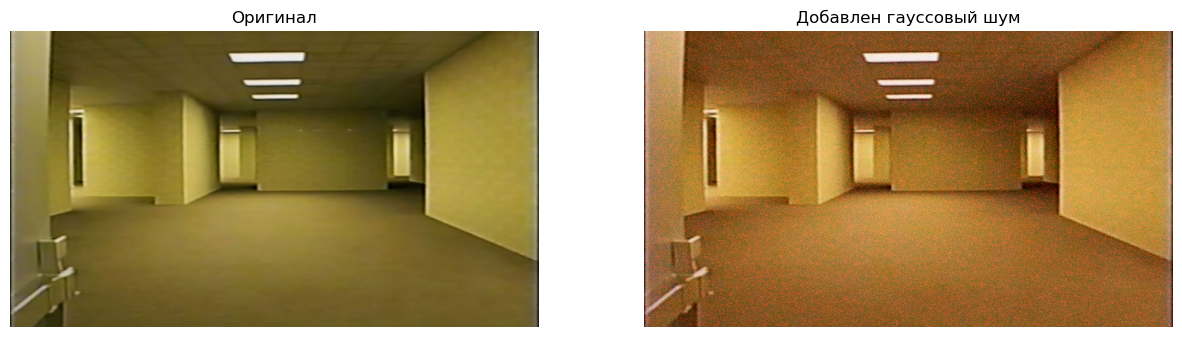

In [2]:
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Рандомная генерация гауссова шума
mean, stddev = 10, 80
noise = np.zeros(img.shape, np.uint8)
cv2.randn(noise, mean, stddev)

# Добавляем шум
noisy_img = cv2.add(img, noise)

show2compare(img, noisy_img, "Оригинал", "Добавлен гауссовый шум", False)

#### Удаление шума
Попробуем удалить шум при помощи медианного фильтра. Он вычисляет медианное значение всех пикселей, окружающих центральный пиксель, и его значение заменяется медианным. <br>
Метод реализуется встроенной функцией cv2.medianBlur(src, size), где size - размер ядра. <br>

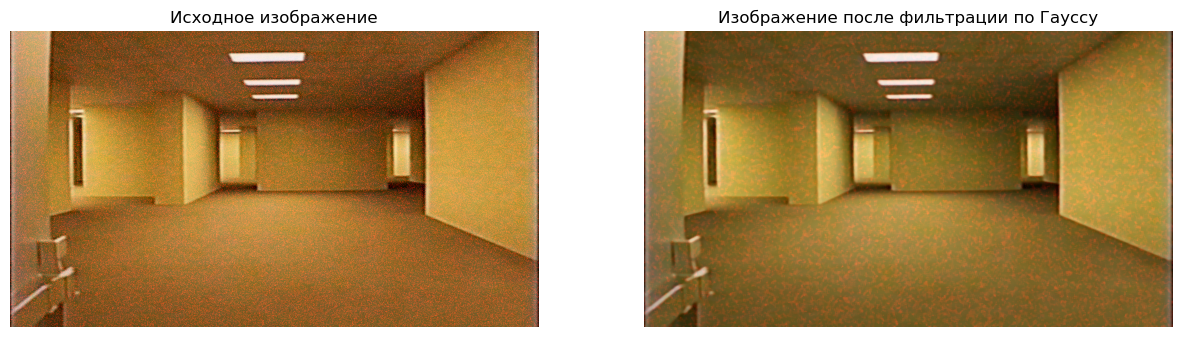

In [3]:
median = cv2.medianBlur(noisy_img,5)

show2compare(noisy_img, median, "Исходное изображение", "Изображение после фильтрации по Гауссу", False)

Удаление шума методом нелокального усреднения.
Данная функция реализует алгоритм, который вычисляет веса в зависимости от расстояния между блоками вокруг пикселей. <br>

Выходное изображение после шумоподавления NLM определяется следующим образом:
$$ NL[v](i) = \sum_{j \in I}^{}w(i,j)v(j),  $$
где $I$ - область поиска, а $w(i, j)$ - вес, который определяется сходством совпадающих блоков.

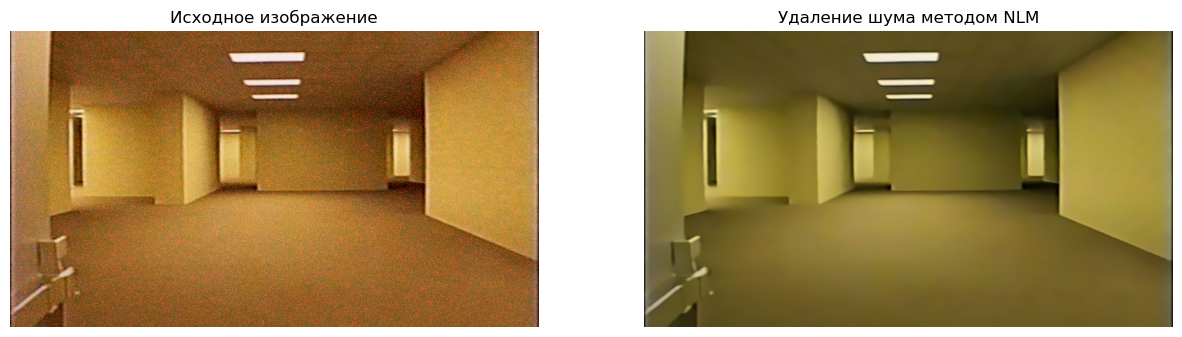

In [4]:
denoised_NLM = cv2.fastNlMeansDenoisingColored(img, None, 10, 10)

show2compare(noisy_img, denoised_NLM, "Исходное изображение", "Удаление шума методом NLM", False)

#### Нахождение вертикальных и горизонтальных границ изображения
Для начала найдем границы встроенной функцией cv2.Sobel(src, dst, dx, dy), параметры которой означают:
src - исходное (входное) изображение, dst - целевое (выходное) изображение, dx и dy - производные соответственно x и y. <br> <br>
Затем выделим границы при помощи оператора Превитта, для этого создаем ядро и применяем его на изображении функцией cv2.filter2D.


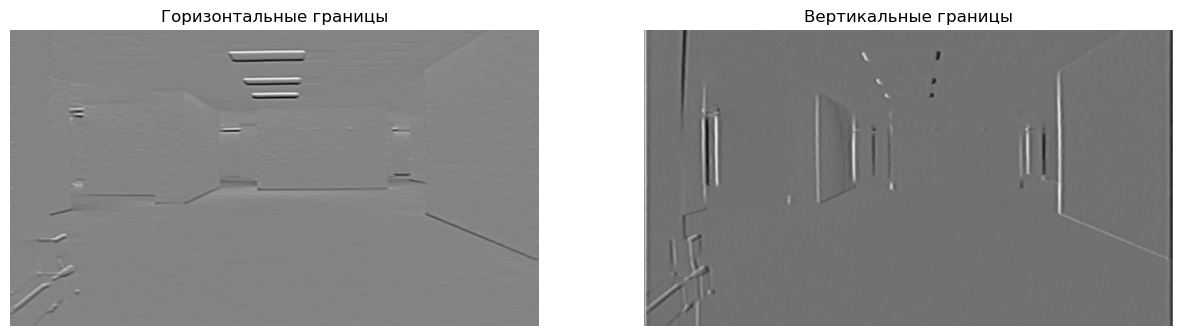

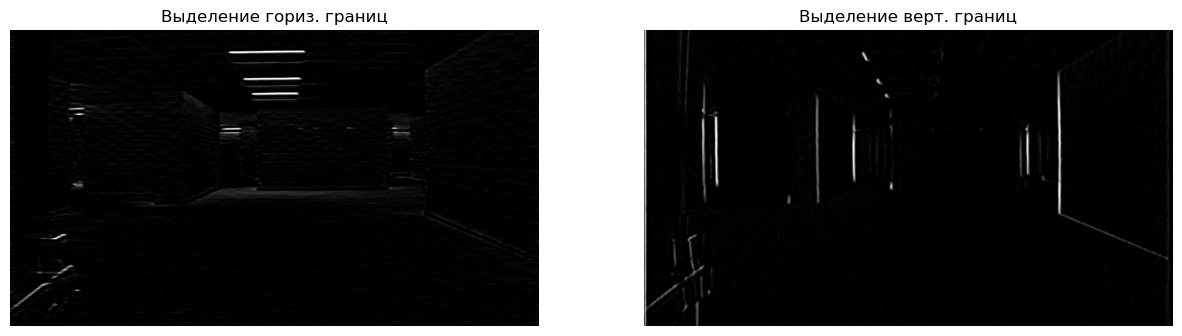

In [5]:
img = cv2.imread(img_path, 0) 

# Оператор Собеля
sobel_vertical = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobel_horizontal = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
show2compare(sobel_horizontal, sobel_vertical, "Горизонтальные границы", "Вертикальные границы", True)

# Ядро (маска)
xkernel = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
ykernel = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

# Наложение маски на изображение
img_prewittx = cv2.filter2D(img, -1, xkernel)
img_prewitty = cv2.filter2D(img, -1, ykernel)

show2compare(img_prewittx, img_prewitty, "Выделение гориз. границ", "Выделение верт. границ", True)